# OBJECTIVE:
Predict the carbon emissions and energy consumption. 

# KEY FEATURES:

*   ***Entity:*** The name of the country or region for which the data is reported (RELEVANT TO THE INVESTIGATION).

*   ***Year:*** The year for which the data is reported, ranging from 2000 to 2020 (RELEVANT TO THE INVESTIGATION).

*   ***Access to electricity (% of population):*** The percentage of population with access to electricity (RELEVANT TO THE ELECTRICITY FORCASTING).

*   ***Access to clean fuels for cooking (% of population):*** The percentage of the population with primary reliance on clean fuels (RELEVANT TO THE INVESTIGATION).

*   ***Renewable-electricity-generating-capacity-per-capita:*** Installed Renewable energy capacity per person

*   ***Financial flows to developing countries (US $):*** Aid and assistance from developed countries for clean energy projects.

*   ***Renewable energy share in total final energy consumption (%):*** Percentage of renewable energy in final energy consumption.

*   ***Electricity from fossil fuels (TWh):*** Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.

*   ***Electricity from nuclear (TWh):*** Electricity generated from nuclear power in terawatt-hours.

*   ***Electricity from renewables (TWh):*** Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.

*   ***Low-carbon electricity (% electricity):*** Percentage of electricity from low-carbon sources (nuclear and renewables).

*   ***Primary energy consumption per capita (kWh/person) -- (TARGET):*** Energy consumption per person in kilowatt-hours.

*   ***Energy intensity level of primary energy (MJ/$2011 PPP GDP):*** Energy use per unit of GDP at purchasing power parity.

*   ***Value_co2_emissions (metric tons per capita) -- (TARGET):*** Carbon dioxide emissions per person in metric tons.

*   ***Renewables (% equivalent primary energy):*** Equivalent primary energy that is derived from renewable sources.

*   ***GDP growth (annual %):*** Annual GDP growth rate based on constant local currency.

*   ***GDP per capita:*** Gross domestic product per person.

*   ***Density (P/Km2):*** Population density in persons per square kilometer.

*   ***Land Area (Km2):*** Total land area in square kilometers.

*   ***Latitude:*** Latitude of the country's centroid in decimal degrees.

*   ***Longitude:*** Longitude of the country's centroid in decimal degrees.

##### NOTE: In parentesis and mayus, we have the variable importance for our investigation (2 targets).

In [1]:
# LIBRARIES:
import pandas as pd
import numpy as np

# IMPUTERS:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# SHOWCASTING THE DATA:
pd.set_option("display.max_column", None)

# TIME SERIES MODELS:
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller

# GRAPHS:
import matplotlib.pyplot as plt

# ENCODERS:
from sklearn.preprocessing import LabelEncoder 

In [24]:
# FUNTIONS:

def NaNs_calculator(data):
    
    '''SHOWING THE STATS OF MISSING DATA AND DATA TYPE'''

    percentage_missing = (data.isna().mean()*100).sort_values(ascending = False)        # Storing the Percentages of NaNs
    sum_missing = data.isna().sum().sort_values(ascending = False)                      # Storing the Sum of NaNs
    names = sum_missing.index.to_list()                                                 # Storing names (to show in the columns)
    data_type = data[names].dtypes                                                      # Storing the type of data based on the order from the previous obtained data (slicing)
    sum_values = sum_missing.to_list()                                                  # Getting count of missing values
    perc_values = np.around(percentage_missing.to_list(), 3)                            # Getting percentage of missing values
    types = data_type.to_list()                                                         # Getting the types of the data
    # TURN ALL THE DATA INTO A DATAFRAME
    df_missing = pd.DataFrame({"NAMES" : names,                                         
                                    "VALUE COUNT" : sum_values,
                                    "PERCENTAGE (%)" : perc_values,
                                    "DATA TYPE": types})
    return df_missing


def drawing(data, energy_country, Graph_name):
    
    """PLOTTING WITH A FOR LOOP"""
    # plt.figure(figsize=(12, 80))
    # plt.subplot(22, 2, 1)
    # drawing(data[0])

    # Iterate over unique countries and plot their time series    
    for country in data:
        plt.plot(energy_country.loc[energy_country['Entity'] == country].index, energy_country.loc[energy_country['Entity'] == country][Graph_name], label=country)
    
    plt.xlabel('Year')
    plt.ylabel('Energy Consumption per country')
    plt.title('Energy Consumption Over Time (2000-2020)')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.grid()
    plt.tight_layout()


def data_slicing(data, chunk_number):
    """THIS FUNCTION WILL SLICE THE DATA FRAME INTO SMALER PIECES. FOR EXAMPLE, PASSING THE COUNTRIES IN WILL PROVIDE THE LABELS FOR YOUR GRAPHS"""
    
    # EXTRACTING THE CHUCKS
    segment_numbers = int(len(data)/chunk_number)           # for example a chunk_number of 4 will give 4 segments of 44 rows per chunk. 
    sliced_df = []                                          # Stored chunks
    segment = None                                          # to store the slice 

    for chunk in range(0, len(data), segment_numbers):
        segment = data[chunk:chunk + segment_numbers]       # Start index to the end
        sliced_df.append(segment)                           # Storing the segment

    return sliced_df

In [3]:
# IMPORTING DATA:
df = pd.read_csv(r"/Users/alberto/Desktop/PROJECTS/ML on Cloud/global-data-on-sustainable-energy.csv")
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.93911,67.709953


# FORMATTING DATA AND REMOVING THE DATA THAT IS NOT NEEDED:
We are leaving the columns Entity, Value_co2_emissions_kt_by_country (Target 2) and Primary energy consumption per capita (kWh/person) (Target 1)

In [4]:
# DROPPING ALL THE COLUMNS:
data_filtered = df[['Entity', 'Year', 'Value_co2_emissions_kt_by_country', 'Primary energy consumption per capita (kWh/person)']]
data_filtered.head(23)

,Entity,Year,Value_co2_emissions_kt_by_country,Primary energy consumption per capita (kWh/person)
0,Afghanistan,2000,760.000000,302.59482
1,Afghanistan,2001,730.000000,236.89185
2,Afghanistan,2002,1029.999971,210.86215
3,Afghanistan,2003,1220.000029,229.96822
4,Afghanistan,2004,1029.999971,204.23125
5,Afghanistan,2005,1549.999952,252.06912
6,Afghanistan,2006,1759.999990,304.42090
7,Afghanistan,2007,1769.999981,354.27990
8,Afghanistan,2008,3559.999943,607.83350
9,Afghanistan,2009,4880.000114,975.04816


In [5]:
# FORMATTING THE COLUMN NAMES SO IT IS EASIER TO HANDLE THEM (PUTTING THE '_' ON ANY SPACE):

for x in data_filtered.columns:
    if x == "Value_co2_emissions_kt_by_country":
        name = x.replace("Value_co2_emissions_kt_by_country", "CO2_EMISSIONS")
        data_filtered = data_filtered.rename(columns={x: name})
    elif x == "Primary energy consumption per capita (kWh/person)":
        name = x.replace("Primary energy consumption per capita (kWh/person)", "ENERGY_CONSUMPTION(KWH/PERSON)")
        data_filtered = data_filtered.rename(columns={x: name})

In [6]:
# SIZE OF THE DATA:
print(f'The number of rows is: {data_filtered.shape[0]}')
print(f'The number of columns is: {data_filtered.shape[1]}')

The number of rows is: 3649
The number of columns is: 4


# CHECKING AND HANDLING MISSING VALUES AND DATA TYPE:

In [7]:
# MISSING DATA ON THE DATASET (TOTAL): (This goes before the describe)
df_missing_values = NaNs_calculator(data_filtered)
df_missing_values

,NAMES,VALUE COUNT,PERCENTAGE (%),DATA TYPE
0,CO2_EMISSIONS,428,11.729,float64
1,Entity,0,0.000,object
2,Year,0,0.000,int64
3,ENERGY_CONSUMPTION(KWH/PERSON),0,0.000,float64


Let's impute the values:

In [8]:
# IMPUTING VALUES WITH THE IMPUTER: GETTING THE COLUMNS WHERE WE WANT TO IMPUTE (NOT THE ONE WITH ZERO NaNs):
to_impute = NaNs_calculator(data_filtered)                                          # Basically, I am calling again the data frame to filter it
names_to_impute = to_impute[to_impute["PERCENTAGE (%)"] > 0]["NAMES"].tolist()      # Leaving out the columns that got no NaNs
col = data_filtered[names_to_impute]                                                # Selecting only the column names to be imputed

# IMPUTING:
imputer = IterativeImputer(max_iter=10, random_state=0)                             # instantiating the imputer
imputed_col = imputer.fit_transform(col)                                            # Fitting the new data to the columns
data_filtered.loc[:, names_to_impute] = imputed_col                                 # Replace the imputed values back into the original DataFrame                    

In [9]:
NaNs_calculator(data_filtered)  

,NAMES,VALUE COUNT,PERCENTAGE (%),DATA TYPE
0,Entity,0,0.0,object
1,Year,0,0.0,int64
2,CO2_EMISSIONS,0,0.0,float64
3,ENERGY_CONSUMPTION(KWH/PERSON),0,0.0,float64


In [10]:
# SHOWING THE DATA SET AGAIN:
data_filtered.head(24)

,Entity,Year,CO2_EMISSIONS,ENERGY_CONSUMPTION(KWH/PERSON)
0,Afghanistan,2000,760.000000,302.59482
1,Afghanistan,2001,730.000000,236.89185
2,Afghanistan,2002,1029.999971,210.86215
3,Afghanistan,2003,1220.000029,229.96822
4,Afghanistan,2004,1029.999971,204.23125
5,Afghanistan,2005,1549.999952,252.06912
6,Afghanistan,2006,1759.999990,304.42090
7,Afghanistan,2007,1769.999981,354.27990
8,Afghanistan,2008,3559.999943,607.83350
9,Afghanistan,2009,4880.000114,975.04816


In [11]:
# CHECKING THE DATA STATISTIC OF THE DATA: (This goes after we remove the NaN values)
data_filtered[['CO2_EMISSIONS', 'ENERGY_CONSUMPTION(KWH/PERSON)']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CO2_EMISSIONS,3649.0,159866.462686,726860.823737,10.0,2509.99999,18120.00084,141380.0049,10707219.73
ENERGY_CONSUMPTION(KWH/PERSON),3649.0,25743.981745,34773.221366,0.0,3116.73730,13120.57000,33892.7800,262585.70


CHECK WHERE THE OUTLIERS NEED TO BE ADDRESSED (IF ANY).

CHECK IF ALL THE DATA NEEDS TO BE STANDARISED/NORMALISED: Selecting the right normalization method for your time-series data is essential for enhancing the performance and robustness of your expert system.

# BEFORE THIS, WE NEED TO CHECK HOW TO SELECT THE COUNTRY FIRST:
    1. Selecting the country
    2. Parsing the dates into index, getting the frequent and datetime well set up

# PLOTTING THE ENERGY CONSUMPTION PER COUNTRY:

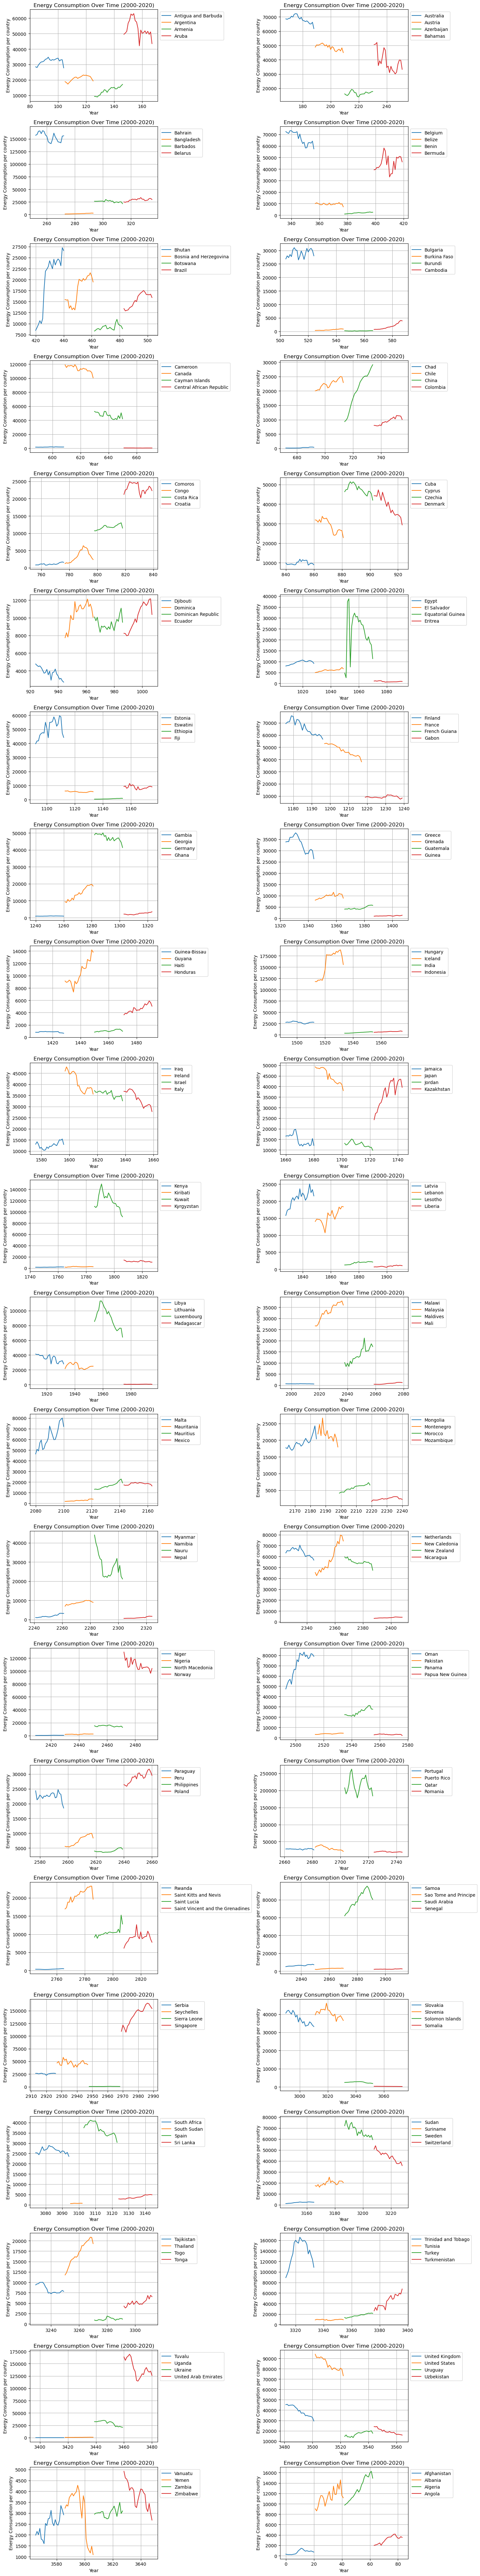

CPU times: user 34.5 s, sys: 418 ms, total: 34.9 s
Wall time: 34.9 s


In [25]:
%%time
# PLOTTING THE TREND OF ENERGY CONSUMPTION PER COUNTRY
# Let's slice the graphs

energy_country = data_filtered[['Entity', 'ENERGY_CONSUMPTION(KWH/PERSON)']]   # Enerigy consumption per country
data = data_slicing(energy_country['Entity'].unique(), 44)                                              # Passing only the countries to plot the trend afterwards (10 countries per graph)
total_graphs = len(data)                                                                                # Define the total number of graphs and the number of columns
num_columns = 2                                                                                         # Defining the nnumber of columns
num_rows = (total_graphs + num_columns - 1) // num_columns                                              # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15,80))                                        # Create the subplot grid
axes = axes.flatten()                                                                                   # Flatten the axes array for easier iteration (2D)

# Iterate over each graph and plot it in the corresponding subplot
for i, c in enumerate(data):
    ax = axes[i]
    drawing(c, energy_country,'ENERGY_CONSUMPTION(KWH/PERSON)')
    plt.sca(ax)                                                                                         # Set the current axis to the current subplot

# Hide any unused subplots
for ax in axes[total_graphs:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

# need the same thing for the Co2

As we can see in the plots, there are some marked trends and seasonalities that makes the Time series not to be stationary. It is recommendable to work with stationaries Time series. On the other hand, we need to use a more robust way of checking the stationarity of a Time series. For this, we are going to uuse the test ***Augmented Dickey-Fuller test (ADF Test)***.

Without entering in details on the math considerations, we need to have 2 things into consideration:
    
    1. The ADF Statistics.
    2. The p_value which in turn has to be less than 0.05 (5%).

# VERIFYING THE STATIONARITY OF THE TIME SERIES:

Since we have two variables, then, I will run the test for the targets only (those are the ones I want to calculate) Co2 and Energy consumption per country.

In [13]:
# # ENERGY:
# ad_fuller_EC = adfuller(data_filtered['ENERGY_CONSUMPTION(KWH/PERSON)'])
# print("ADF test for 'ENERGY_CONSUMPTION(KWH/PERSON)':\n")
# print(f"\t1. ADF Statistic: {ad_fuller_EC[0]}")
# print(f'\t2. P-value: {ad_fuller_EC[1]}\n')

# # CO2:
# ad_fuller_CO2 = adfuller(data_filtered['CO2_EMISSIONS'])
# print("ADF test for CO2_EMISSIONS:\n")
# print(f"\t1. ADF Statistic: {ad_fuller_CO2[0]}")
# print(f'\t2. P-value: {ad_fuller_CO2[1]}\n')

As we can see here, the test is showing us a p-value greater than 0.05 in both cases, which means the series is not stationary.
Let's try to make it stationary.

In [14]:
# # IN THIS CASE, WE ARE GOING TO USE .diff BUT LATER ON, WE CAN CHECK WHAT ELSE WE CAN USE.

# # ENERGY:
# ad_fuller_EC = adfuller(data_filtered['ENERGY_CONSUMPTION(KWH/PERSON)'].diff()[1:])
# print("ADF test for 'ENERGY_CONSUMPTION(KWH/PERSON)':\n")
# print(f"\t1. ADF Statistic: {ad_fuller_EC[0]}")
# print(f'\t2. P-value: {ad_fuller_EC[1]}\n')

# # CO2:
# ad_fuller_CO2 = adfuller(data_filtered['CO2_EMISSIONS'].diff()[1:])
# print("ADF test for CO2_EMISSIONS:\n")
# print(f"\t1. ADF Statistic: {ad_fuller_CO2[0]}")
# print(f'\t2. P-value: {ad_fuller_CO2[1]}\n')

Now, we can see that the series are stationary for the energy consumption.

Another aspect to have in mind is to check if the series are correlating to each other. To check this information, we are going to make use of the granger Casualty test. The test works like this:

*"The data for testing whether the time series in the second column Granger causes the time series in the first column. (Missing values are not supported that is why we cleaned the data frame)".*

Source:

    a. https://www.machinelearningplus.com/time-series/granger-causality-test-in-python/
    b. https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.grangercausalitytests.html

To interpret the test, we should take a look at he P values given. It should be again, less than 0.05

In [15]:
# # PRINTING ENERGY VS CO2:
# print("Energy consumption causes Carbon emissions:\n")
# grangerEnergy_Co2 = grangercausalitytests(filter_df[['TARGET_1_PRIMARY_ENERGY_CONSUMPTION_PER_CAPITA_(KWH/PERSON)', 
#                                                     'TARGET_2_VALUE_CO2_EMISSIONS_PER_COUNTRY']], maxlag=5)

In [16]:
# # PRINTING CO2 VS ENERGY:
# print("Carbon emissions causes Energy consumption:\n")
# grangerCo2_Energy = grangercausalitytests(filter_df[['TARGET_2_VALUE_CO2_EMISSIONS_PER_COUNTRY',
#                                                     'TARGET_1_PRIMARY_ENERGY_CONSUMPTION_PER_CAPITA_(KWH/PERSON)']], maxlag=5)

# SPLITTING THE DATA INTO TRAIN, AND TEST:

    1. We need to extract the column we are going to work with.
    2. Splitting the data (not ramdomizing it since it is a time series)

In [17]:
# final_df = filter_df[['Entity', 'TARGET_1_PRIMARY_ENERGY_CONSUMPTION_PER_CAPITA_(KWH/PERSON)', 
#                                                     'TARGET_2_VALUE_CO2_EMISSIONS_PER_COUNTRY']]
# final_df.head()

In [18]:
# final_df.shape

In [19]:
# # ENCODING THE TEXT TO BE ABLE TO TRAIN THE MODEL:

# # final_df_encoded = final_df.copy() # Create a copy of the DataFrame
# # final_df_encoded
# # encoder = LabelEncoder() # Instantiate the LabelEncoder
# # entity_encoded = encoder.fit_transform(final_df['Entity']) # Encode the 'Entity' column
# # final_df_encoded['Entity_encoded'] = entity_encoded
# # final_df_encoded.drop('Entity', axis = 1, inplace = True)
# # final_df_encoded.head()

# final_df_encoded = final_df[['TARGET_1_PRIMARY_ENERGY_CONSUMPTION_PER_CAPITA_(KWH/PERSON)', 
#                              'TARGET_2_VALUE_CO2_EMISSIONS_PER_COUNTRY']]
# final_df_encoded.head()

In [20]:
# final_df_encoded.index

In [21]:
# # SPLITTING THE DATA:
# train_df = final_df_encoded[:-730]
# test_df = final_df_encoded[-730:]                # 20% for testing

In [22]:
train_df.shape, test_df.shape

NameError: name 'train_df' is not defined

# TRAINING THE MODEL:

In [ ]:
# model = VAR(train_df.diff()[1:])
# sorted_order = model.select_order(maxlags=20)
# sorted_order.summary()

Minimum lags found at the 20th. That is the one we are going to be using in the model

In [ ]:
# %%time
# var_model = VARMAX(train_df, order=(1, 0), enforce_stationarity=True)
# fitted_model = var_model.fit(disp=False)
# fitted_model.summary()

# MAKING PREDICTIONS:

In [ ]:
# n_forecast = 5
# predict = fitted_model.get_prediction(start = len(train_df), end = len(train_df) + n_forecast)
# predictions = predict.predicted_mean

In [ ]:
# predictions.columns = [['TARGET_1_PRIMARY_ENERGY_CONSUMPTION_PER_CAPITA_(KWH/PERSON)',
#        'TARGET_2_VALUE_CO2_EMISSIONS_PER_COUNTRY']]
# predictions